# Zadanie 1 Przekształcenie sfery w elipsoidę
1. Korzystając z równania parametrycznego narysuj sferę jednostkową w 3D
v =
cos(s) sin(t)
sin(s) sin(t)
cos(t)

s ∈[0,2π], t ∈[0,π]

2. Wygeneruj 3 różne macierze A1,A2,A3, (Ai ∈ R3×3), za ich pomocą dokonaj  
przekształcenia sfery w elipsoidę (mnożenie przez macierz), a następnie przedstaw  
wizualizację uzyskanego wyniku w 3D.  

3. Dokonaj rozkładu według wartości osobliwych (SVD) każdej macierzy Ai. Na wy-  
kresie elipsoidy odpowiadającej przekształceniu Ai dodaj wizualizację jej półosi  
wyznaczonych za pomocą SVD.  

4. Wygeneruj taką macierz Ai, aby stosunek jej największej i najmniejszej wartości  
osobliwej był większy od 100. Narysuj odpowiadającą jej elipsoidę.  

5. Dla wybranej macierzy Ai przedstaw wizualizacje SViT , SΣiViT oraz SUiΣiViT ,  
gdzie  
Ai = UiΣiViT ,  
a S oznacza sferę z punktu 1 (S ∈Rn×3).  


In [76]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
import random
import numpy.linalg
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [106]:
S = np.linspace(0, 2*pi, 20)
T = np.linspace(0, pi, 20)

In [107]:
def draw(X, Y, Z):
    fig = plt.figure(figsize=(12,12), dpi=300)
    ax = plt.axes(projection='3d')
    ax.scatter(X, Y, Z, linewidth=0, antialiased=False)
    plt.show()

In [108]:
def svd(A):
    U, s, V = np.linalg.svd(A, full_matrices=True)
    return U, s, V

In [109]:
X = [cos(s) * sin(t) for s in S for t in T]
Y = [sin(s) * sin(t) for s in S for t in T] 
Z = [cos(t) for s in S for t in T]

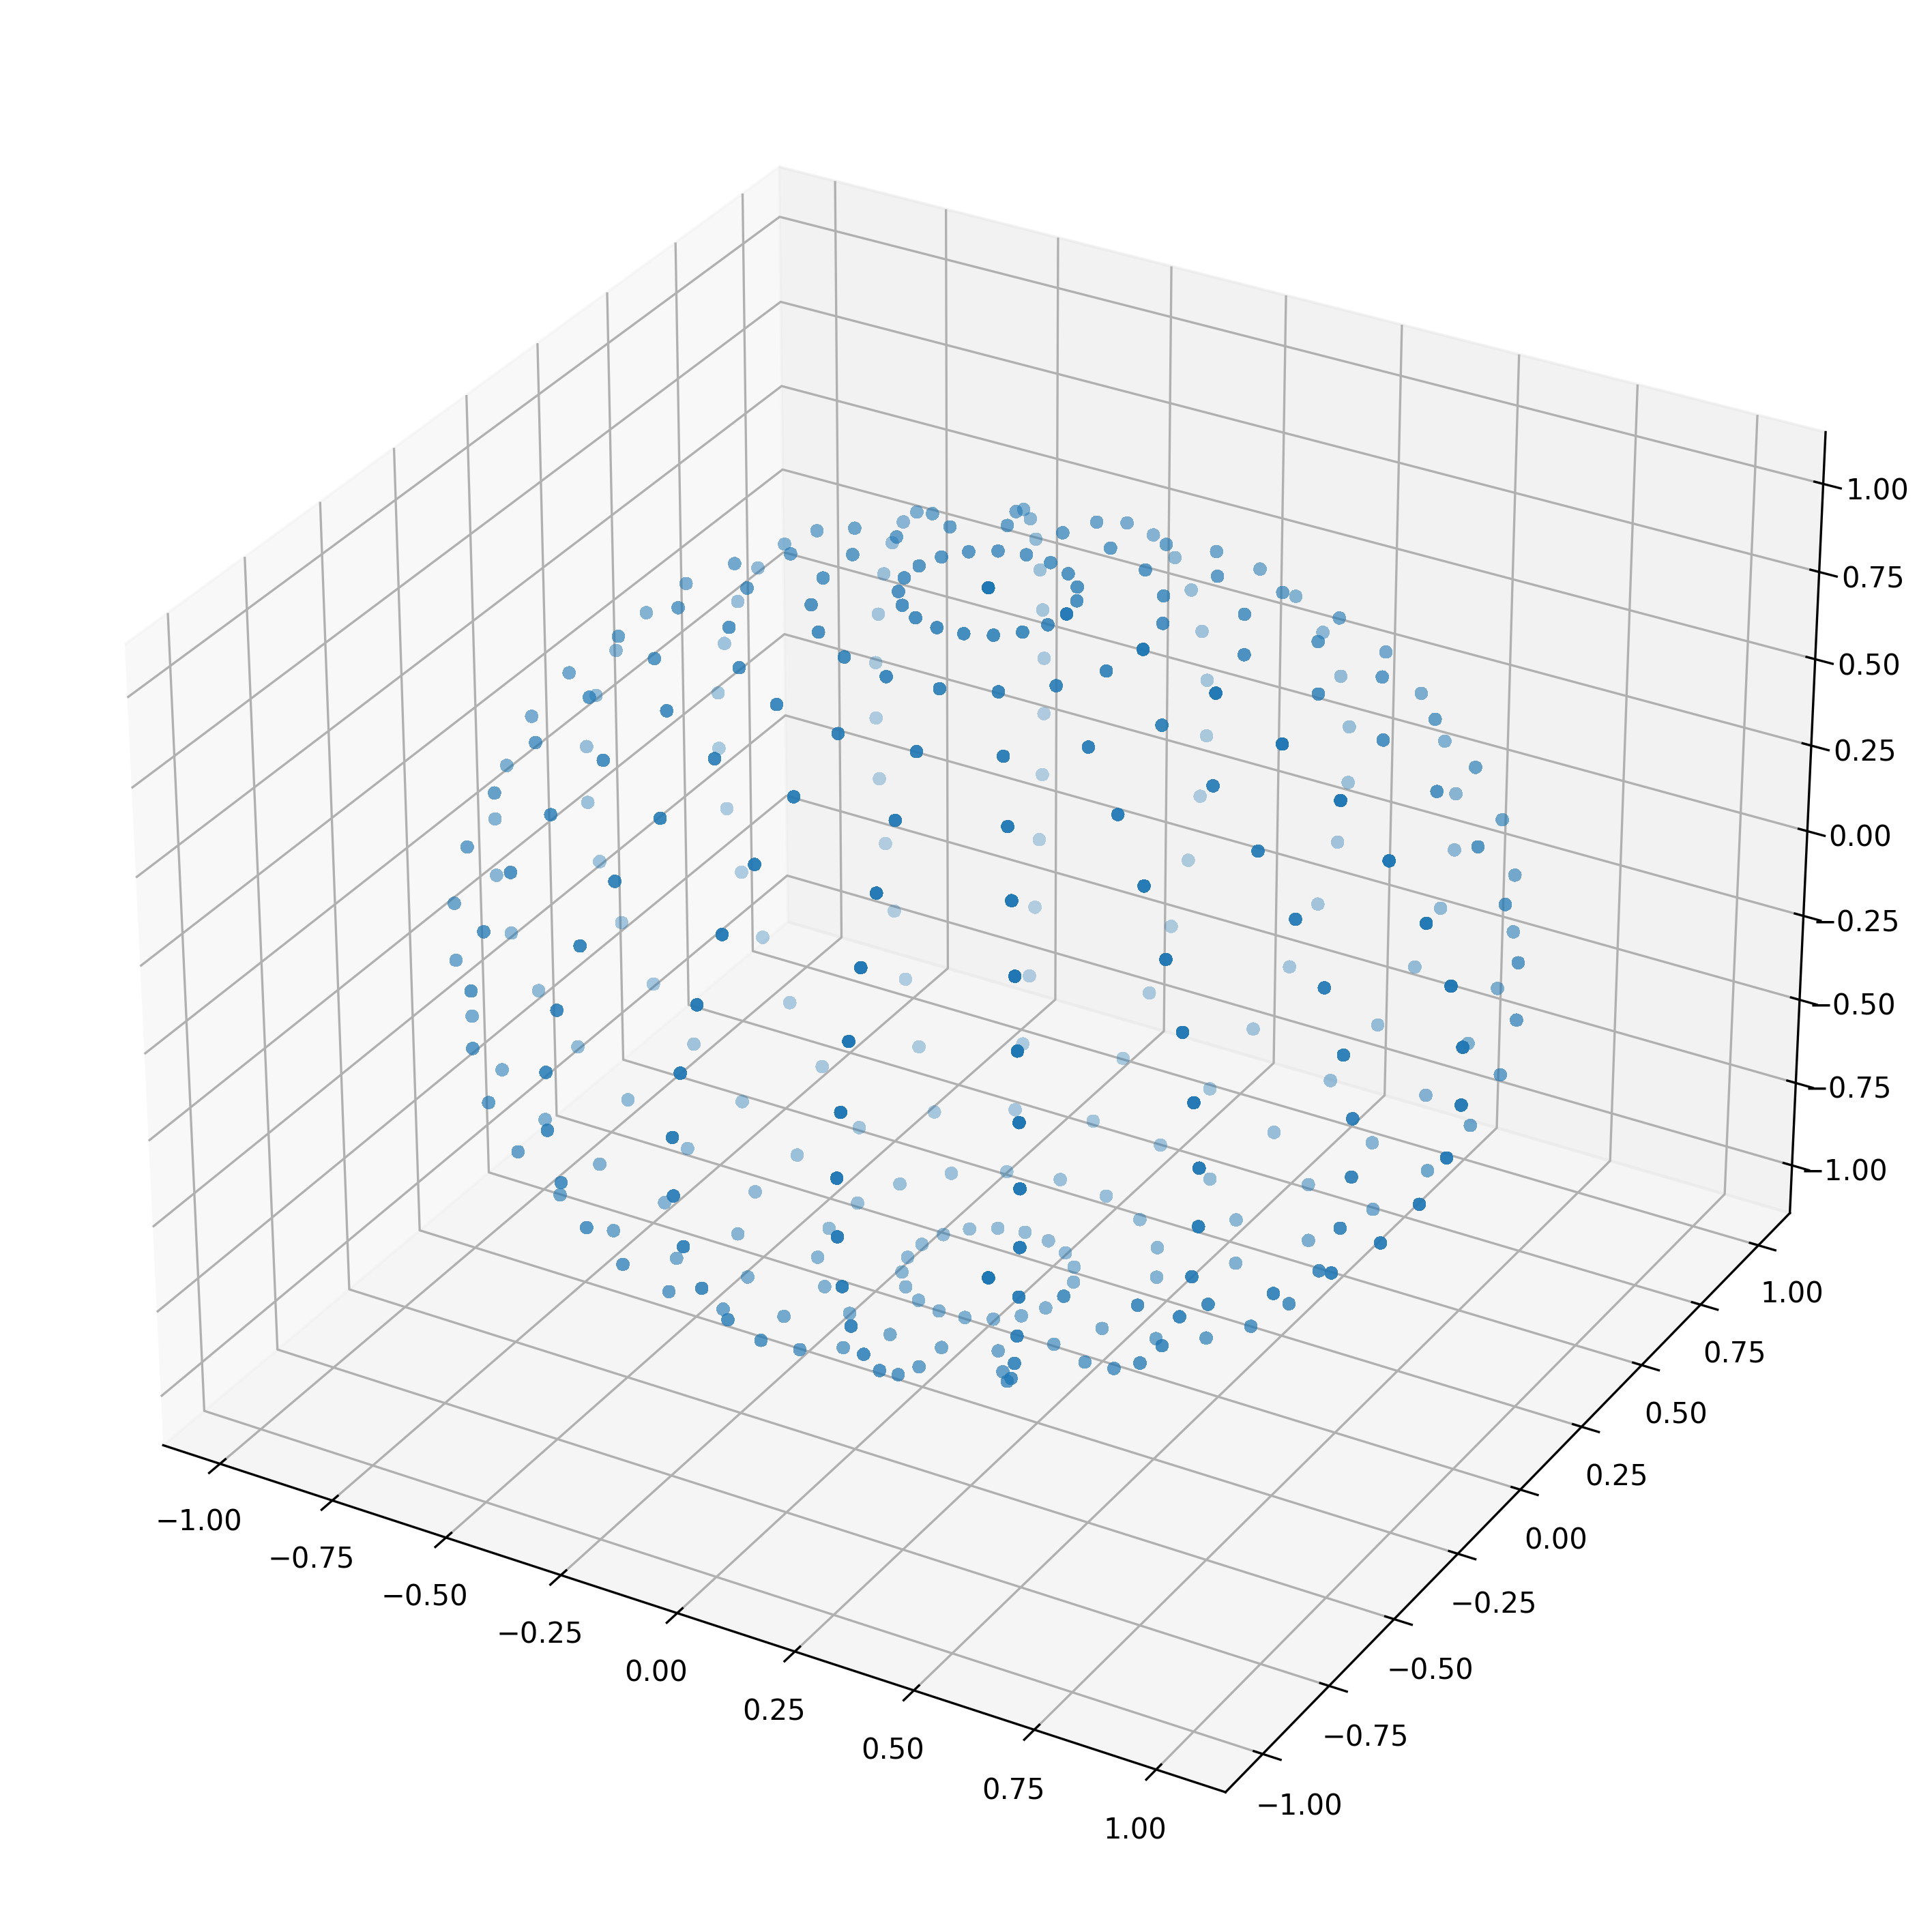

In [110]:
draw(X, Y, Z)

In [111]:
A1 = np.random.rand(3,3)
A2 = np.random.rand(3,3)
A3 = np.random.rand(3,3)

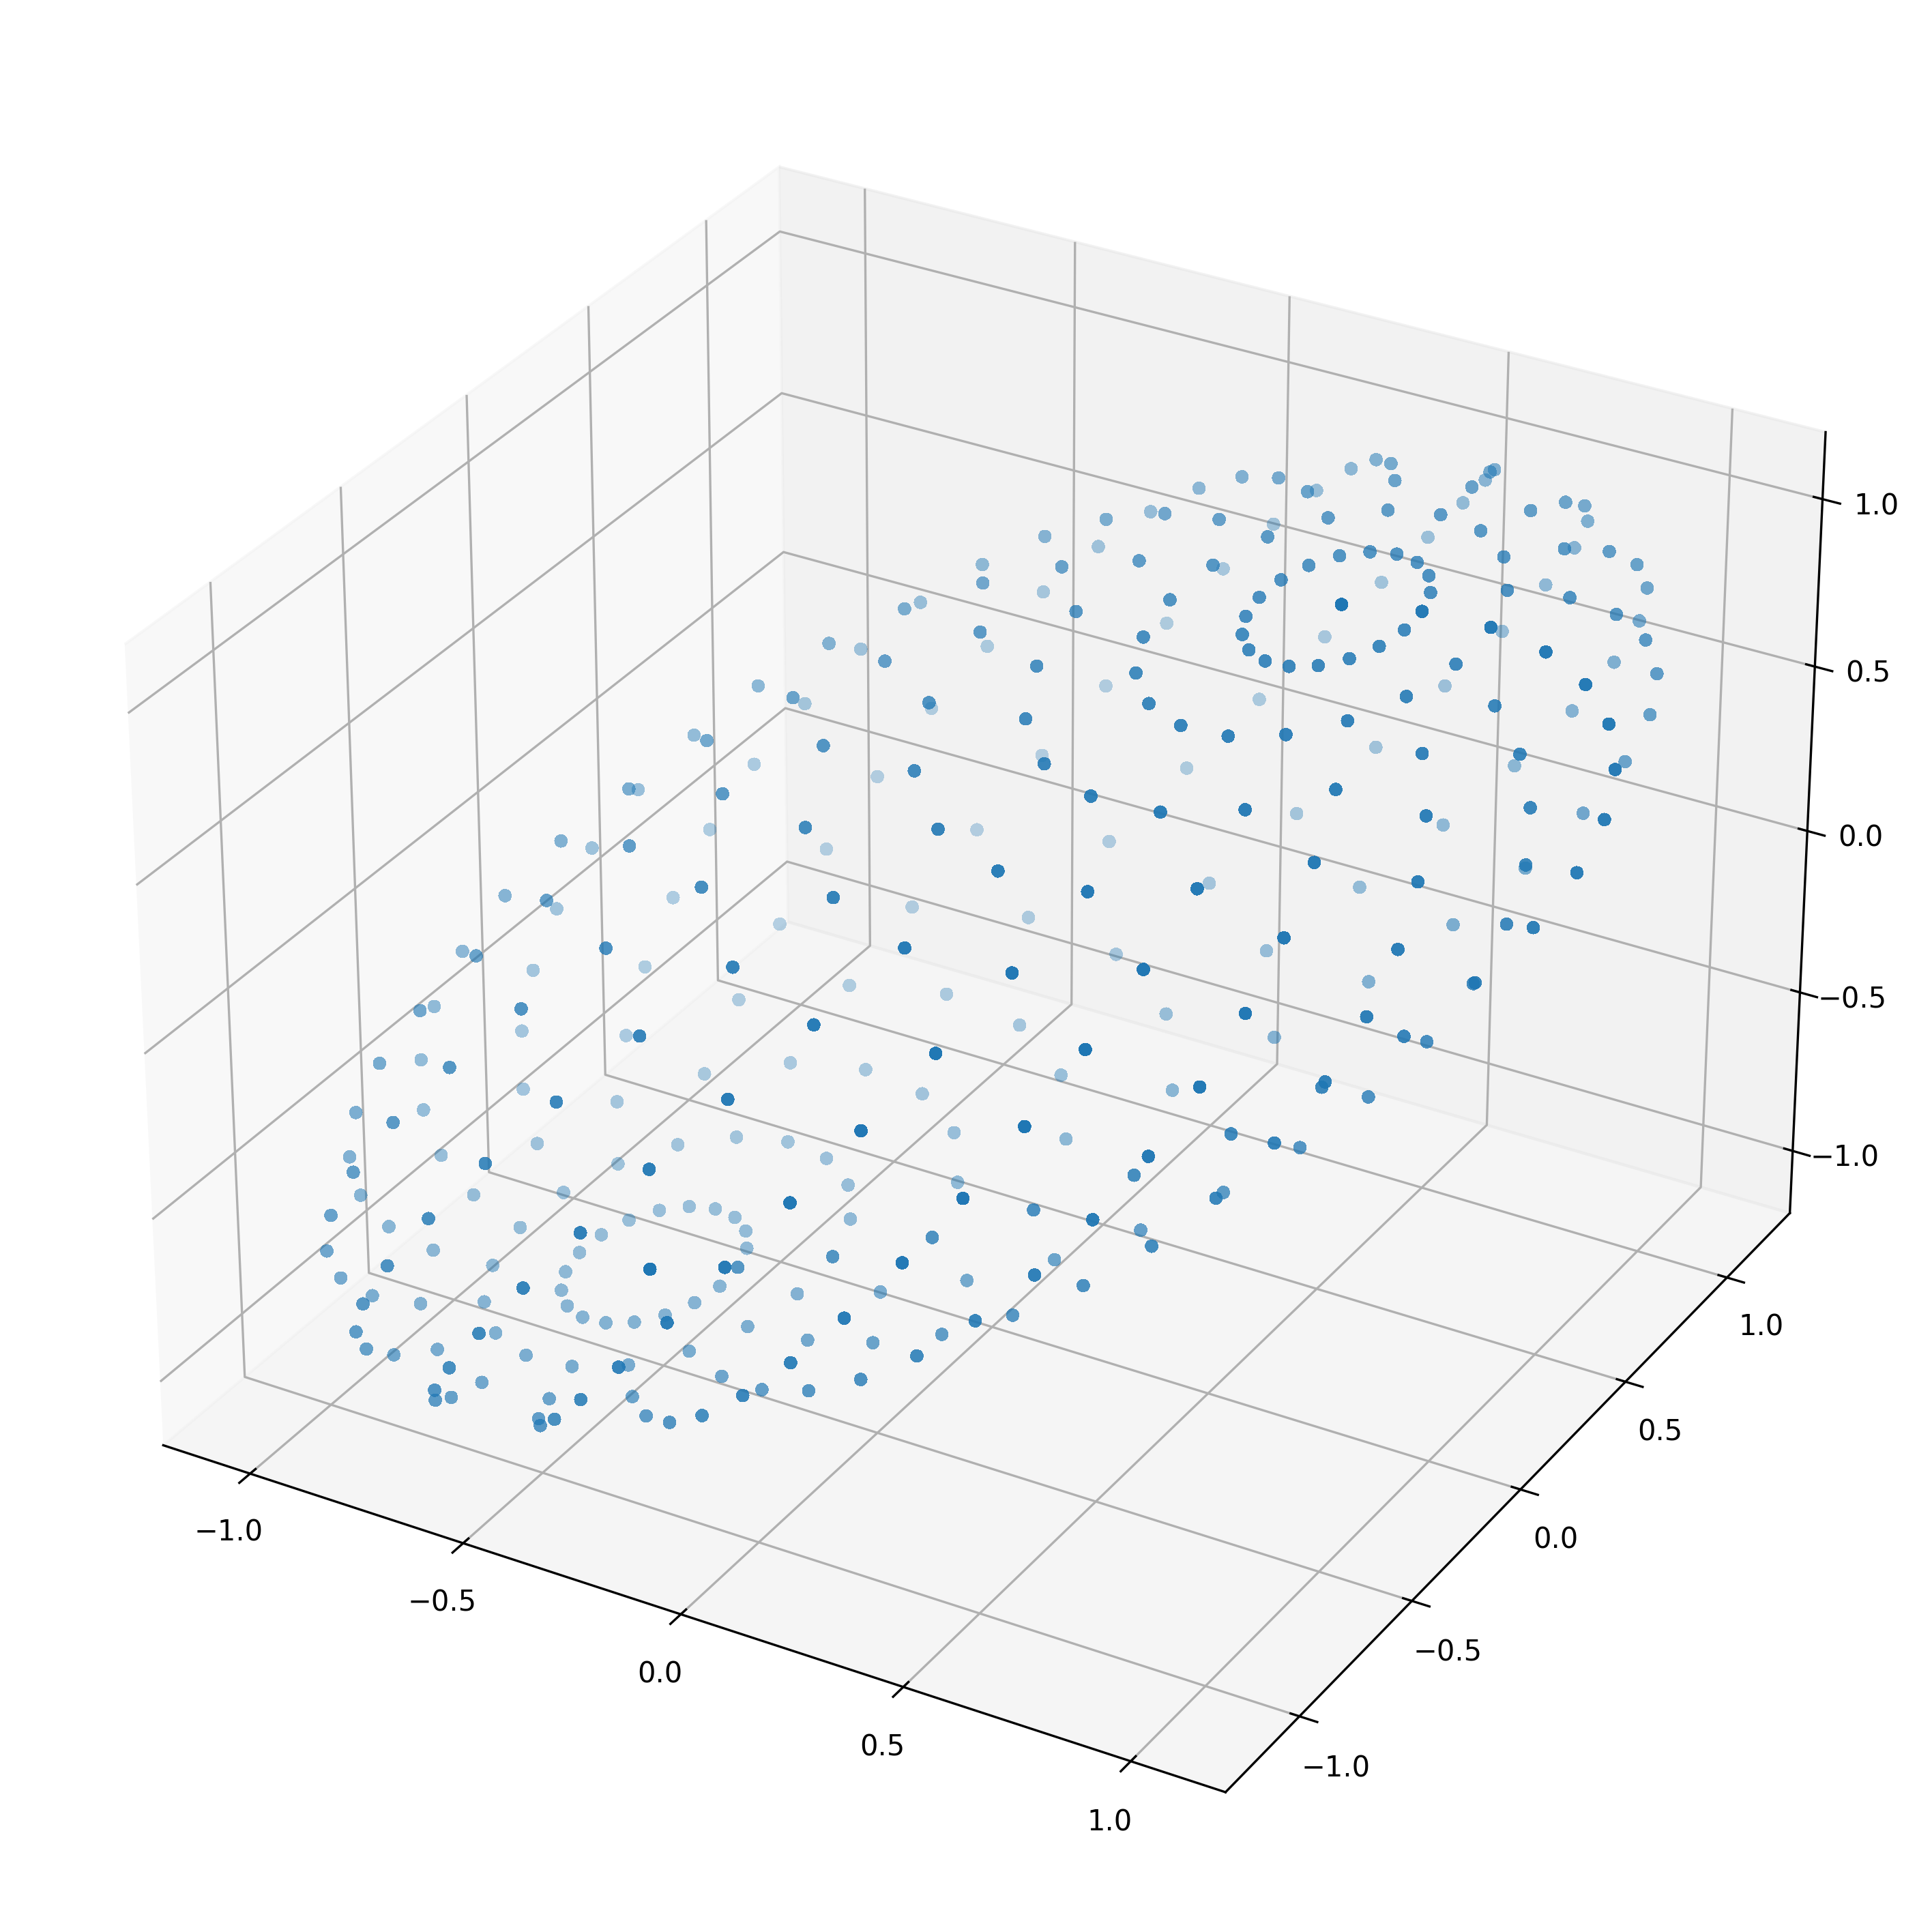

In [112]:
sA1 = A1 @ np.array([X,Y,Z])
draw(*sA1)

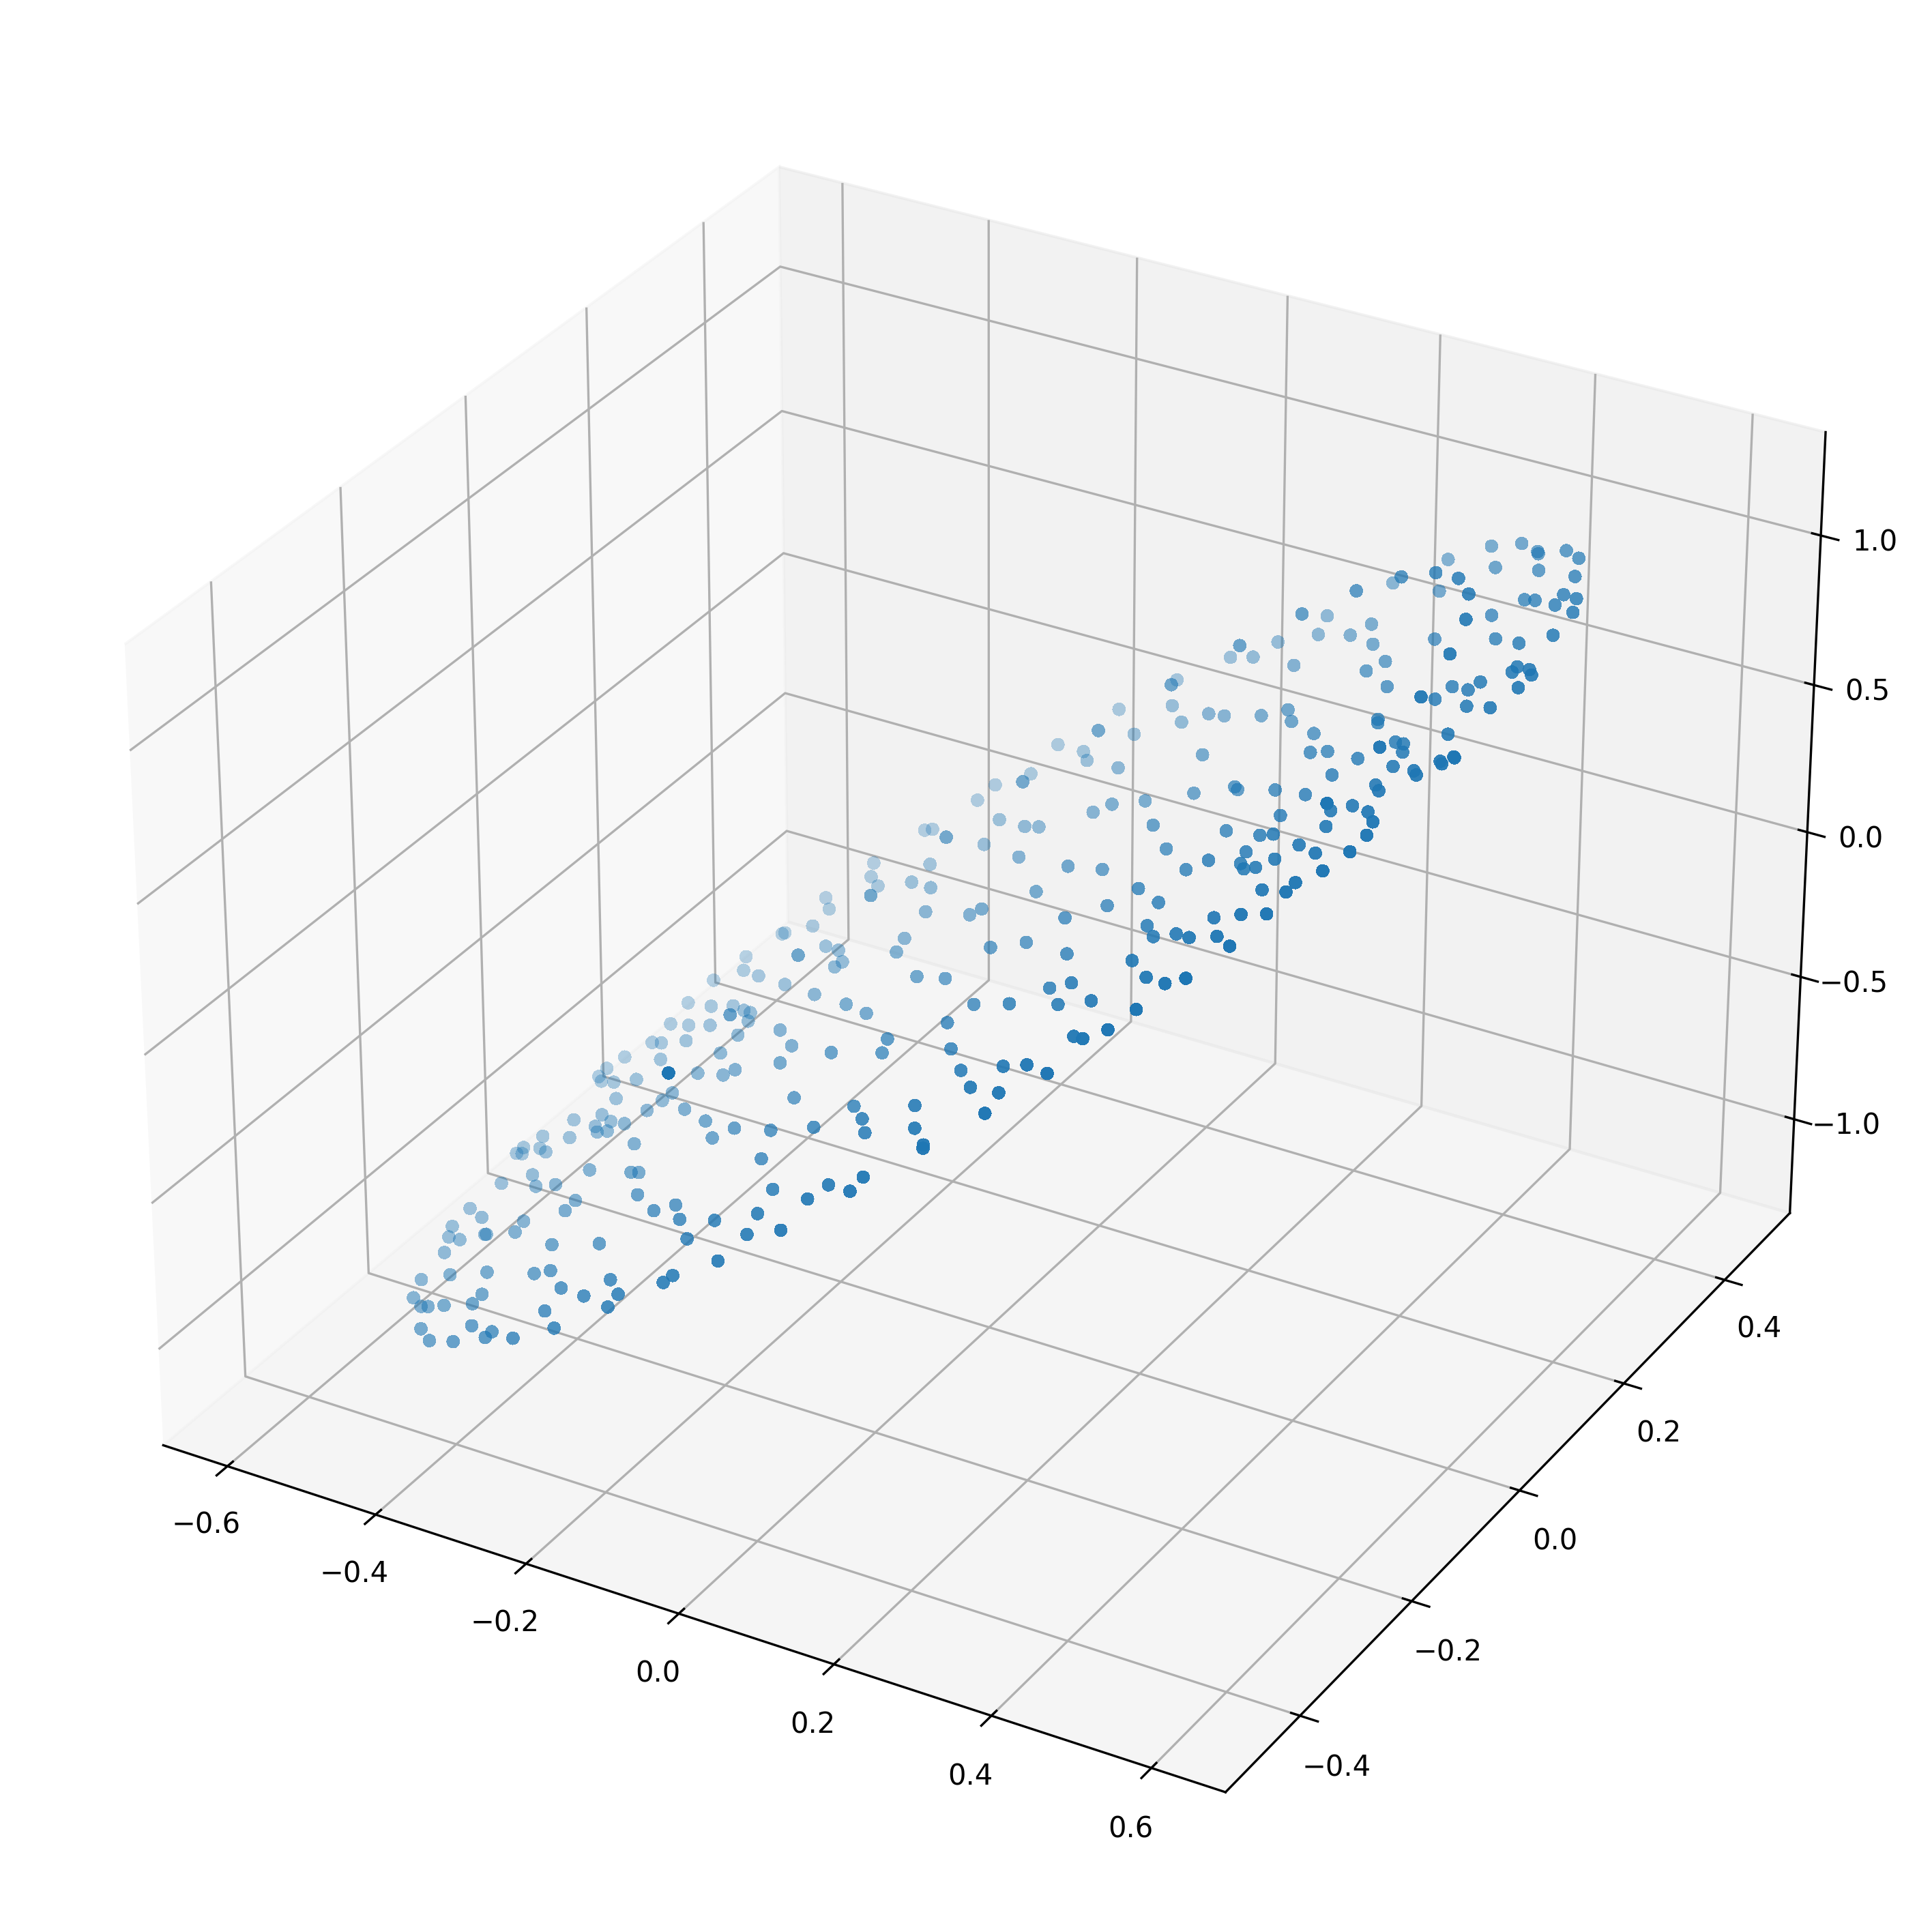

In [113]:
sA2 = A2 @ np.array([X,Y,Z])
draw(*sA2)

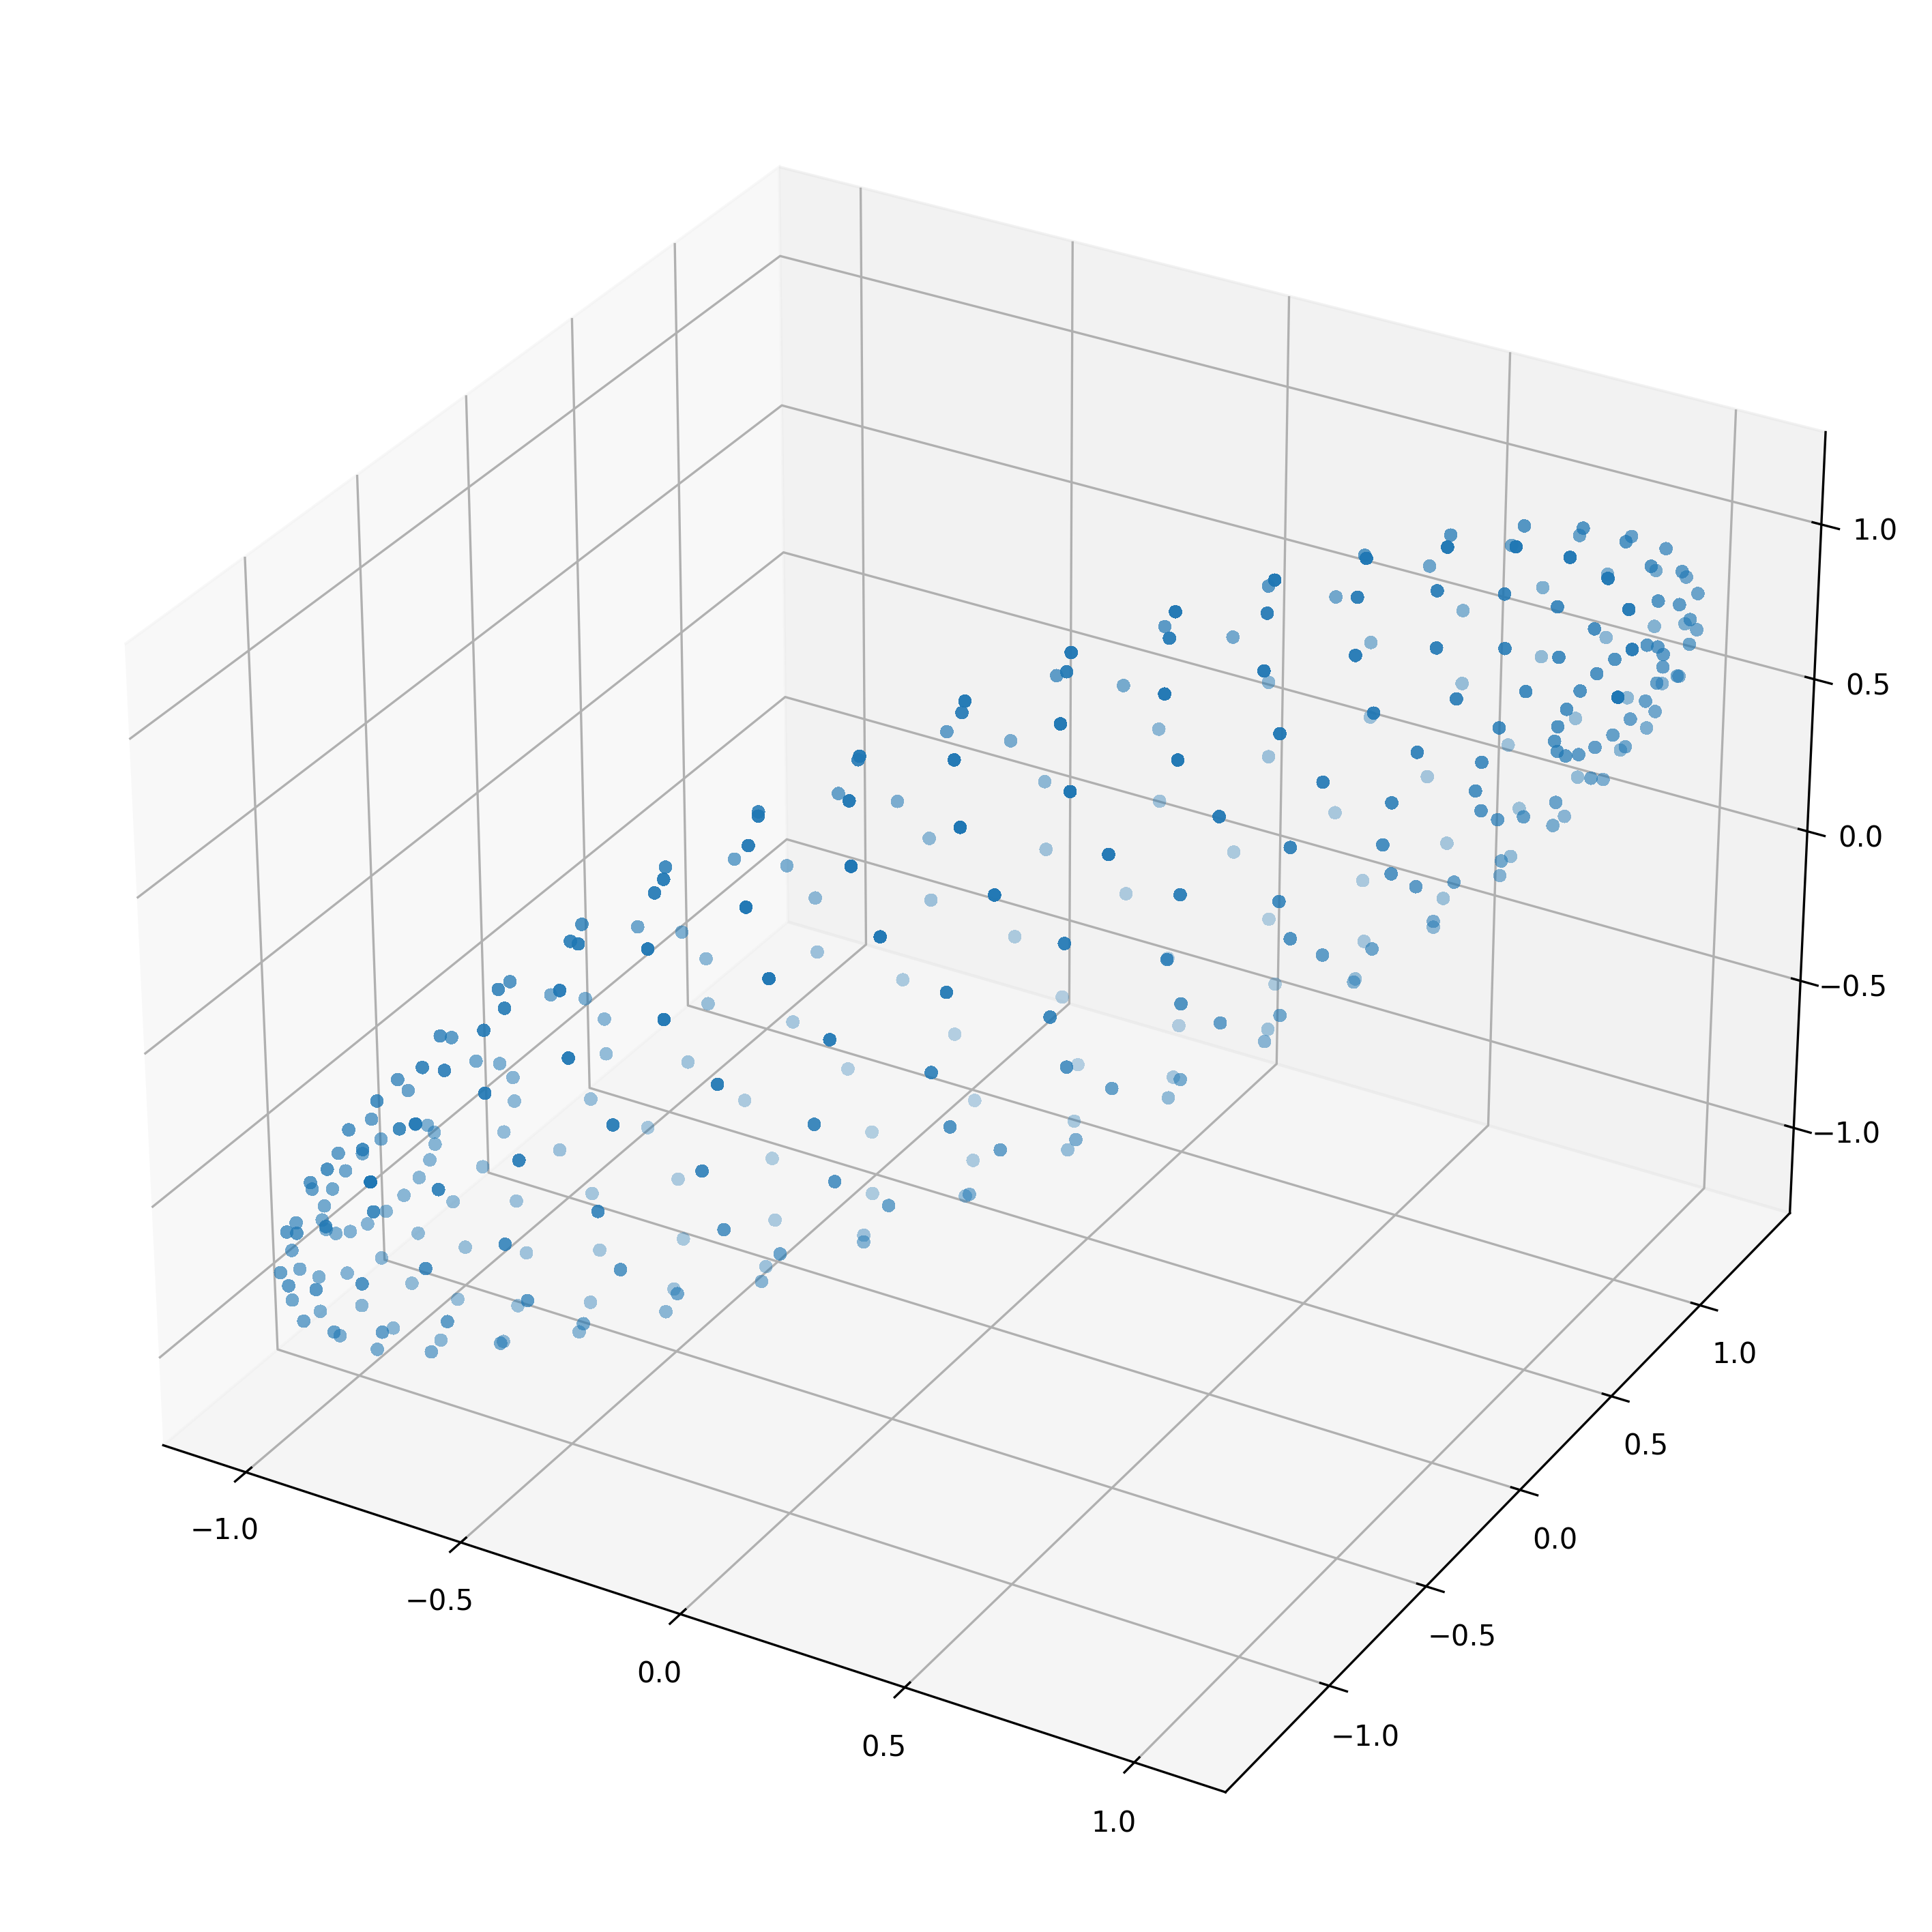

In [114]:
sA3 = A3 @ np.array([X,Y,Z])
draw(*sA3)

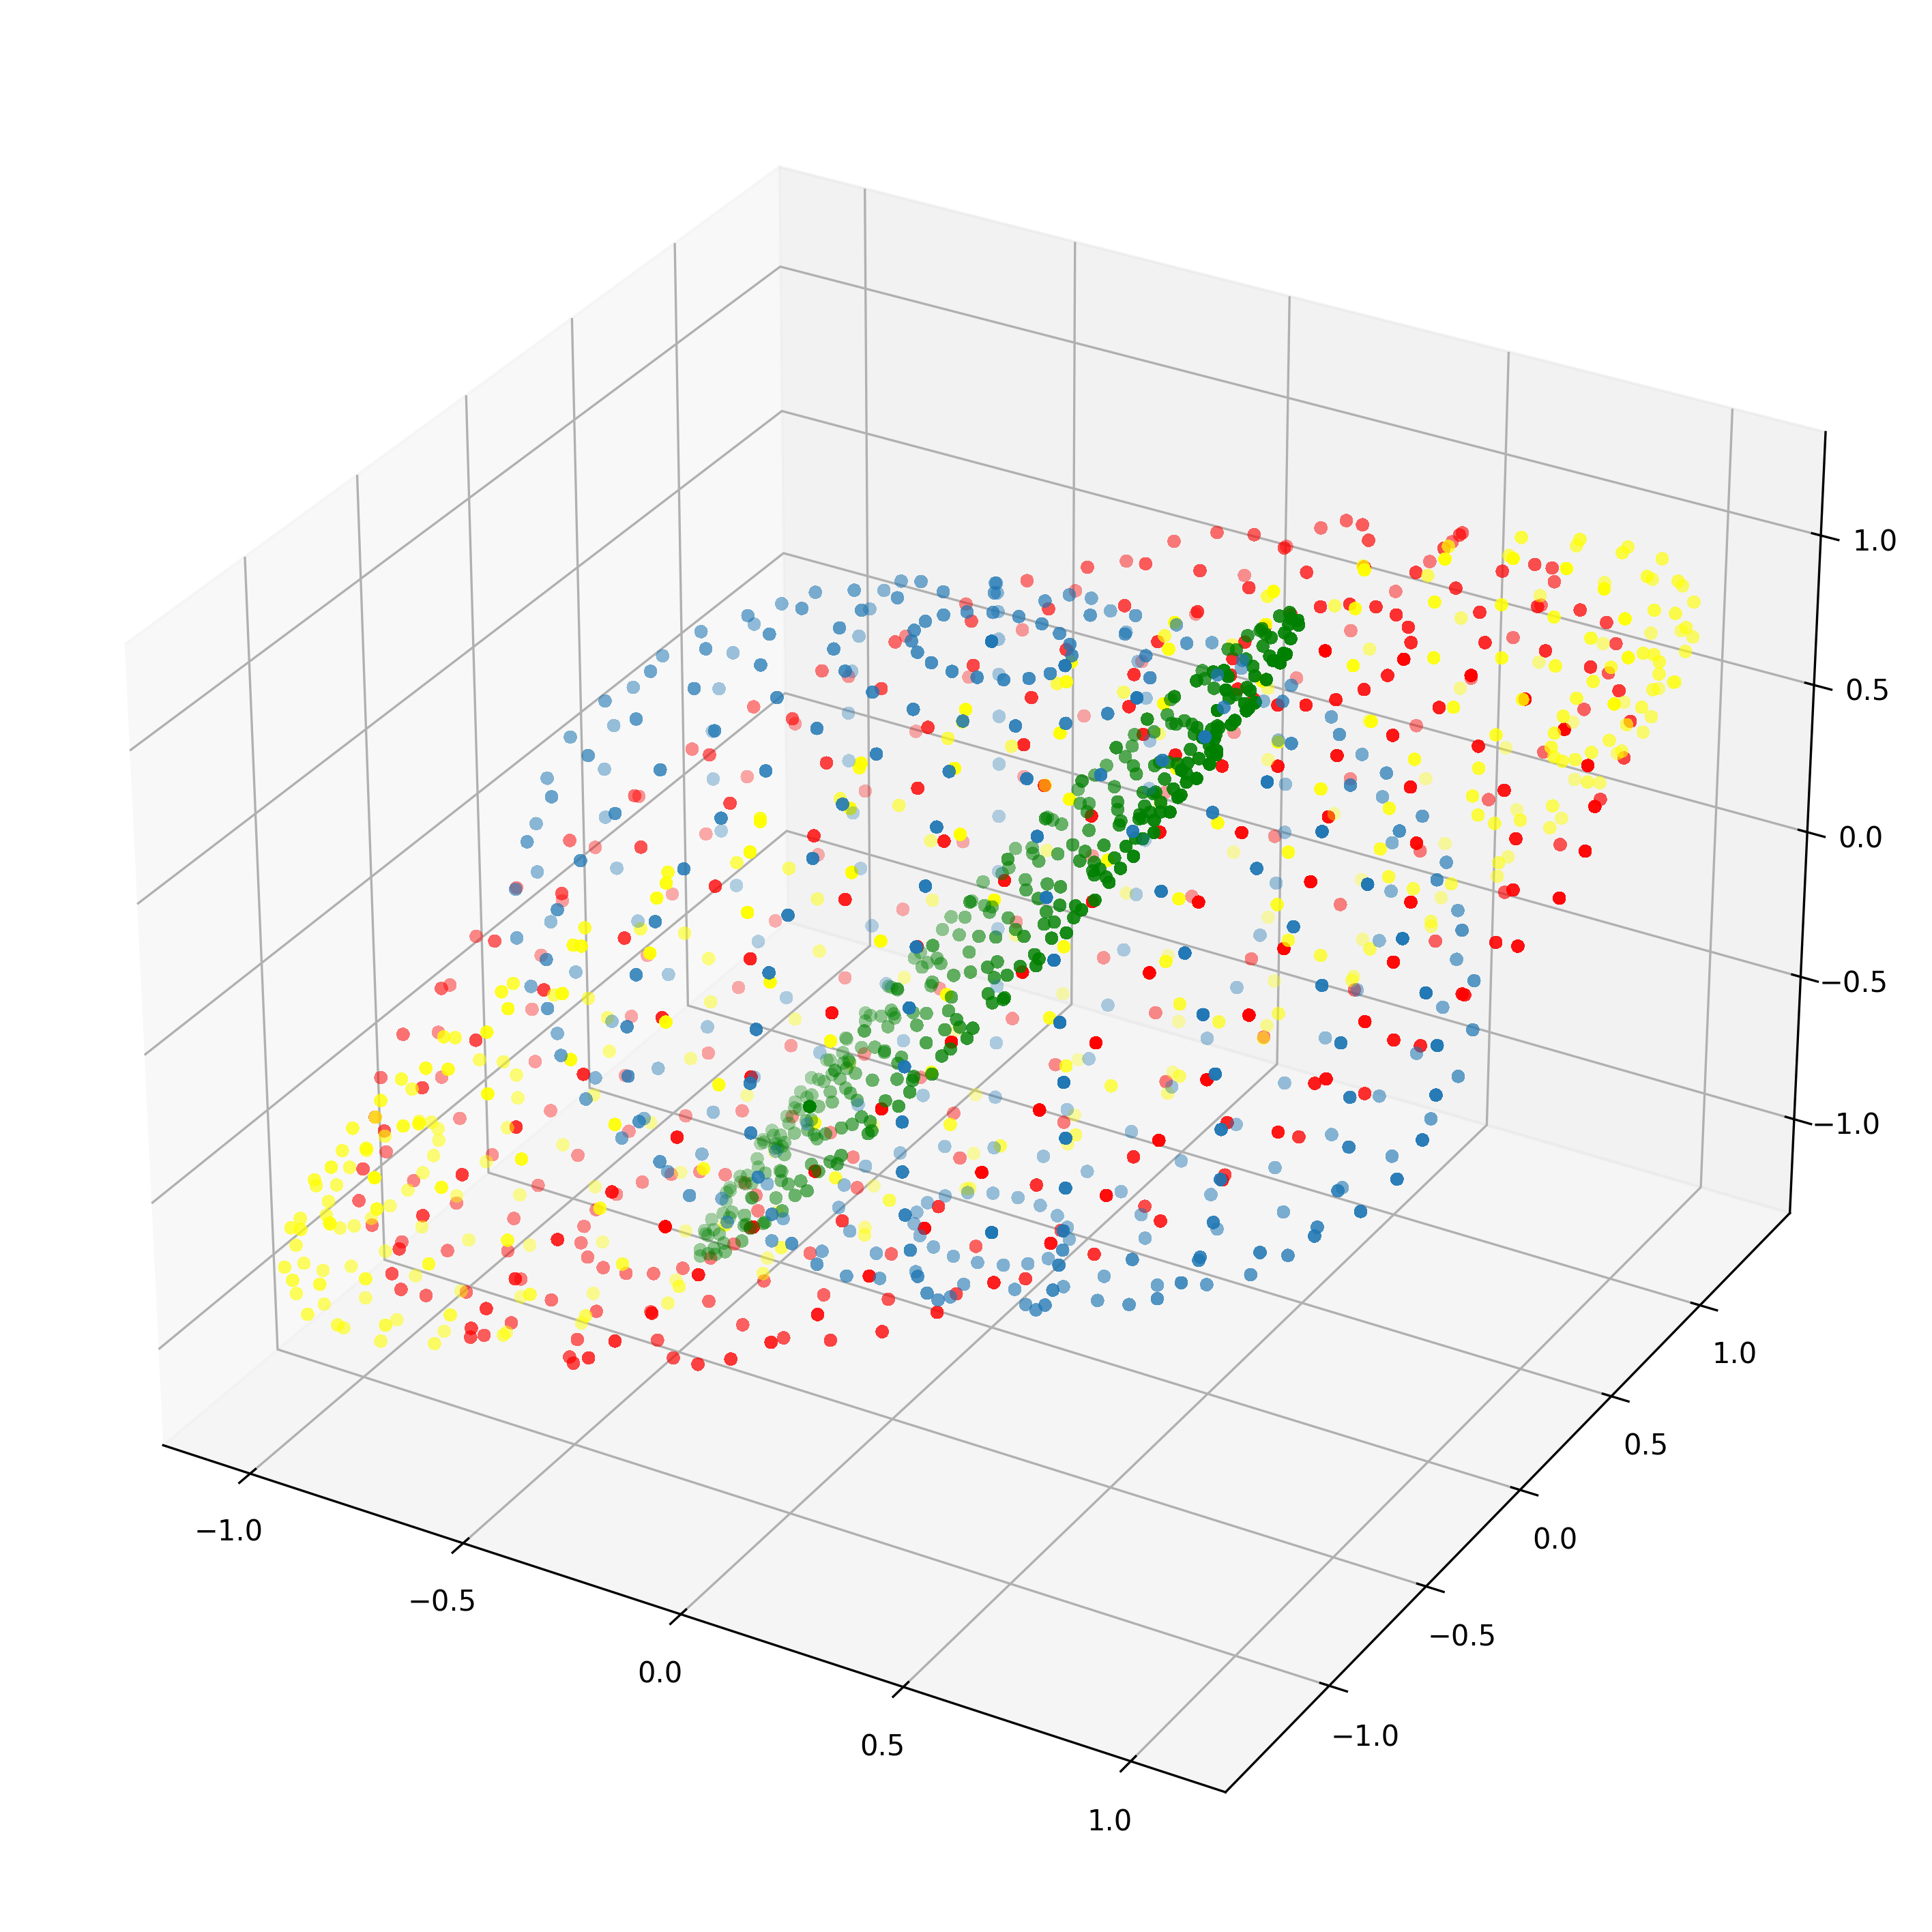

In [115]:
def draw_all(X,Y,Z, X1, Y1, Z1, X2, Y2, Z2, X3, Y3, Z3):
    fig = plt.figure(figsize=(12,12), dpi=300)
    ax = plt.axes(projection='3d')
    ax.scatter(X, Y, Z, linewidth=0, antialiased=False)
    ax.scatter(X1, Y1, Z1, linewidth=0, antialiased=False, color='red')
    ax.scatter(X2, Y2, Z2, linewidth=0, antialiased=False, color='green')
    ax.scatter(X3, Y3, Z3, linewidth=0, antialiased=False, color='yellow')
    plt.show()

draw_all(X,Y,Z, *sA1, *sA2, *sA3)

# SVD

In [116]:
U1, E1, V1 = np.linalg.svd(A1)
U2, E2, V2 = np.linalg.svd(A2)
U3, E3, V3 = np.linalg.svd(A3)

In [117]:
def drawWithVec(sphere, U):
    ax = plt.axes(projection='3d')
    ax.scatter(*sphere, linewidth=0,antialiased=False)
    ax.quiver(0,0,0,*U,color="red")
    plt.show()

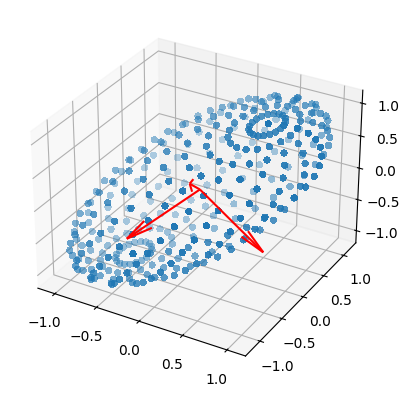

In [118]:
drawWithVec(sA1, U1)

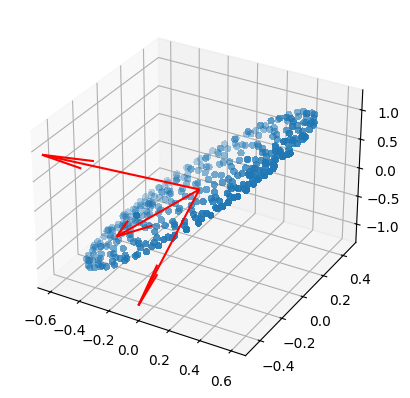

In [119]:
drawWithVec(sA2, U2)

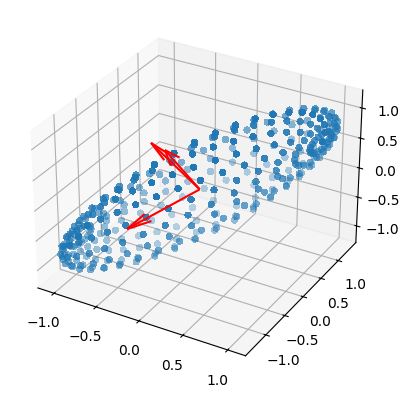

In [120]:
drawWithVec(sA3, U3)

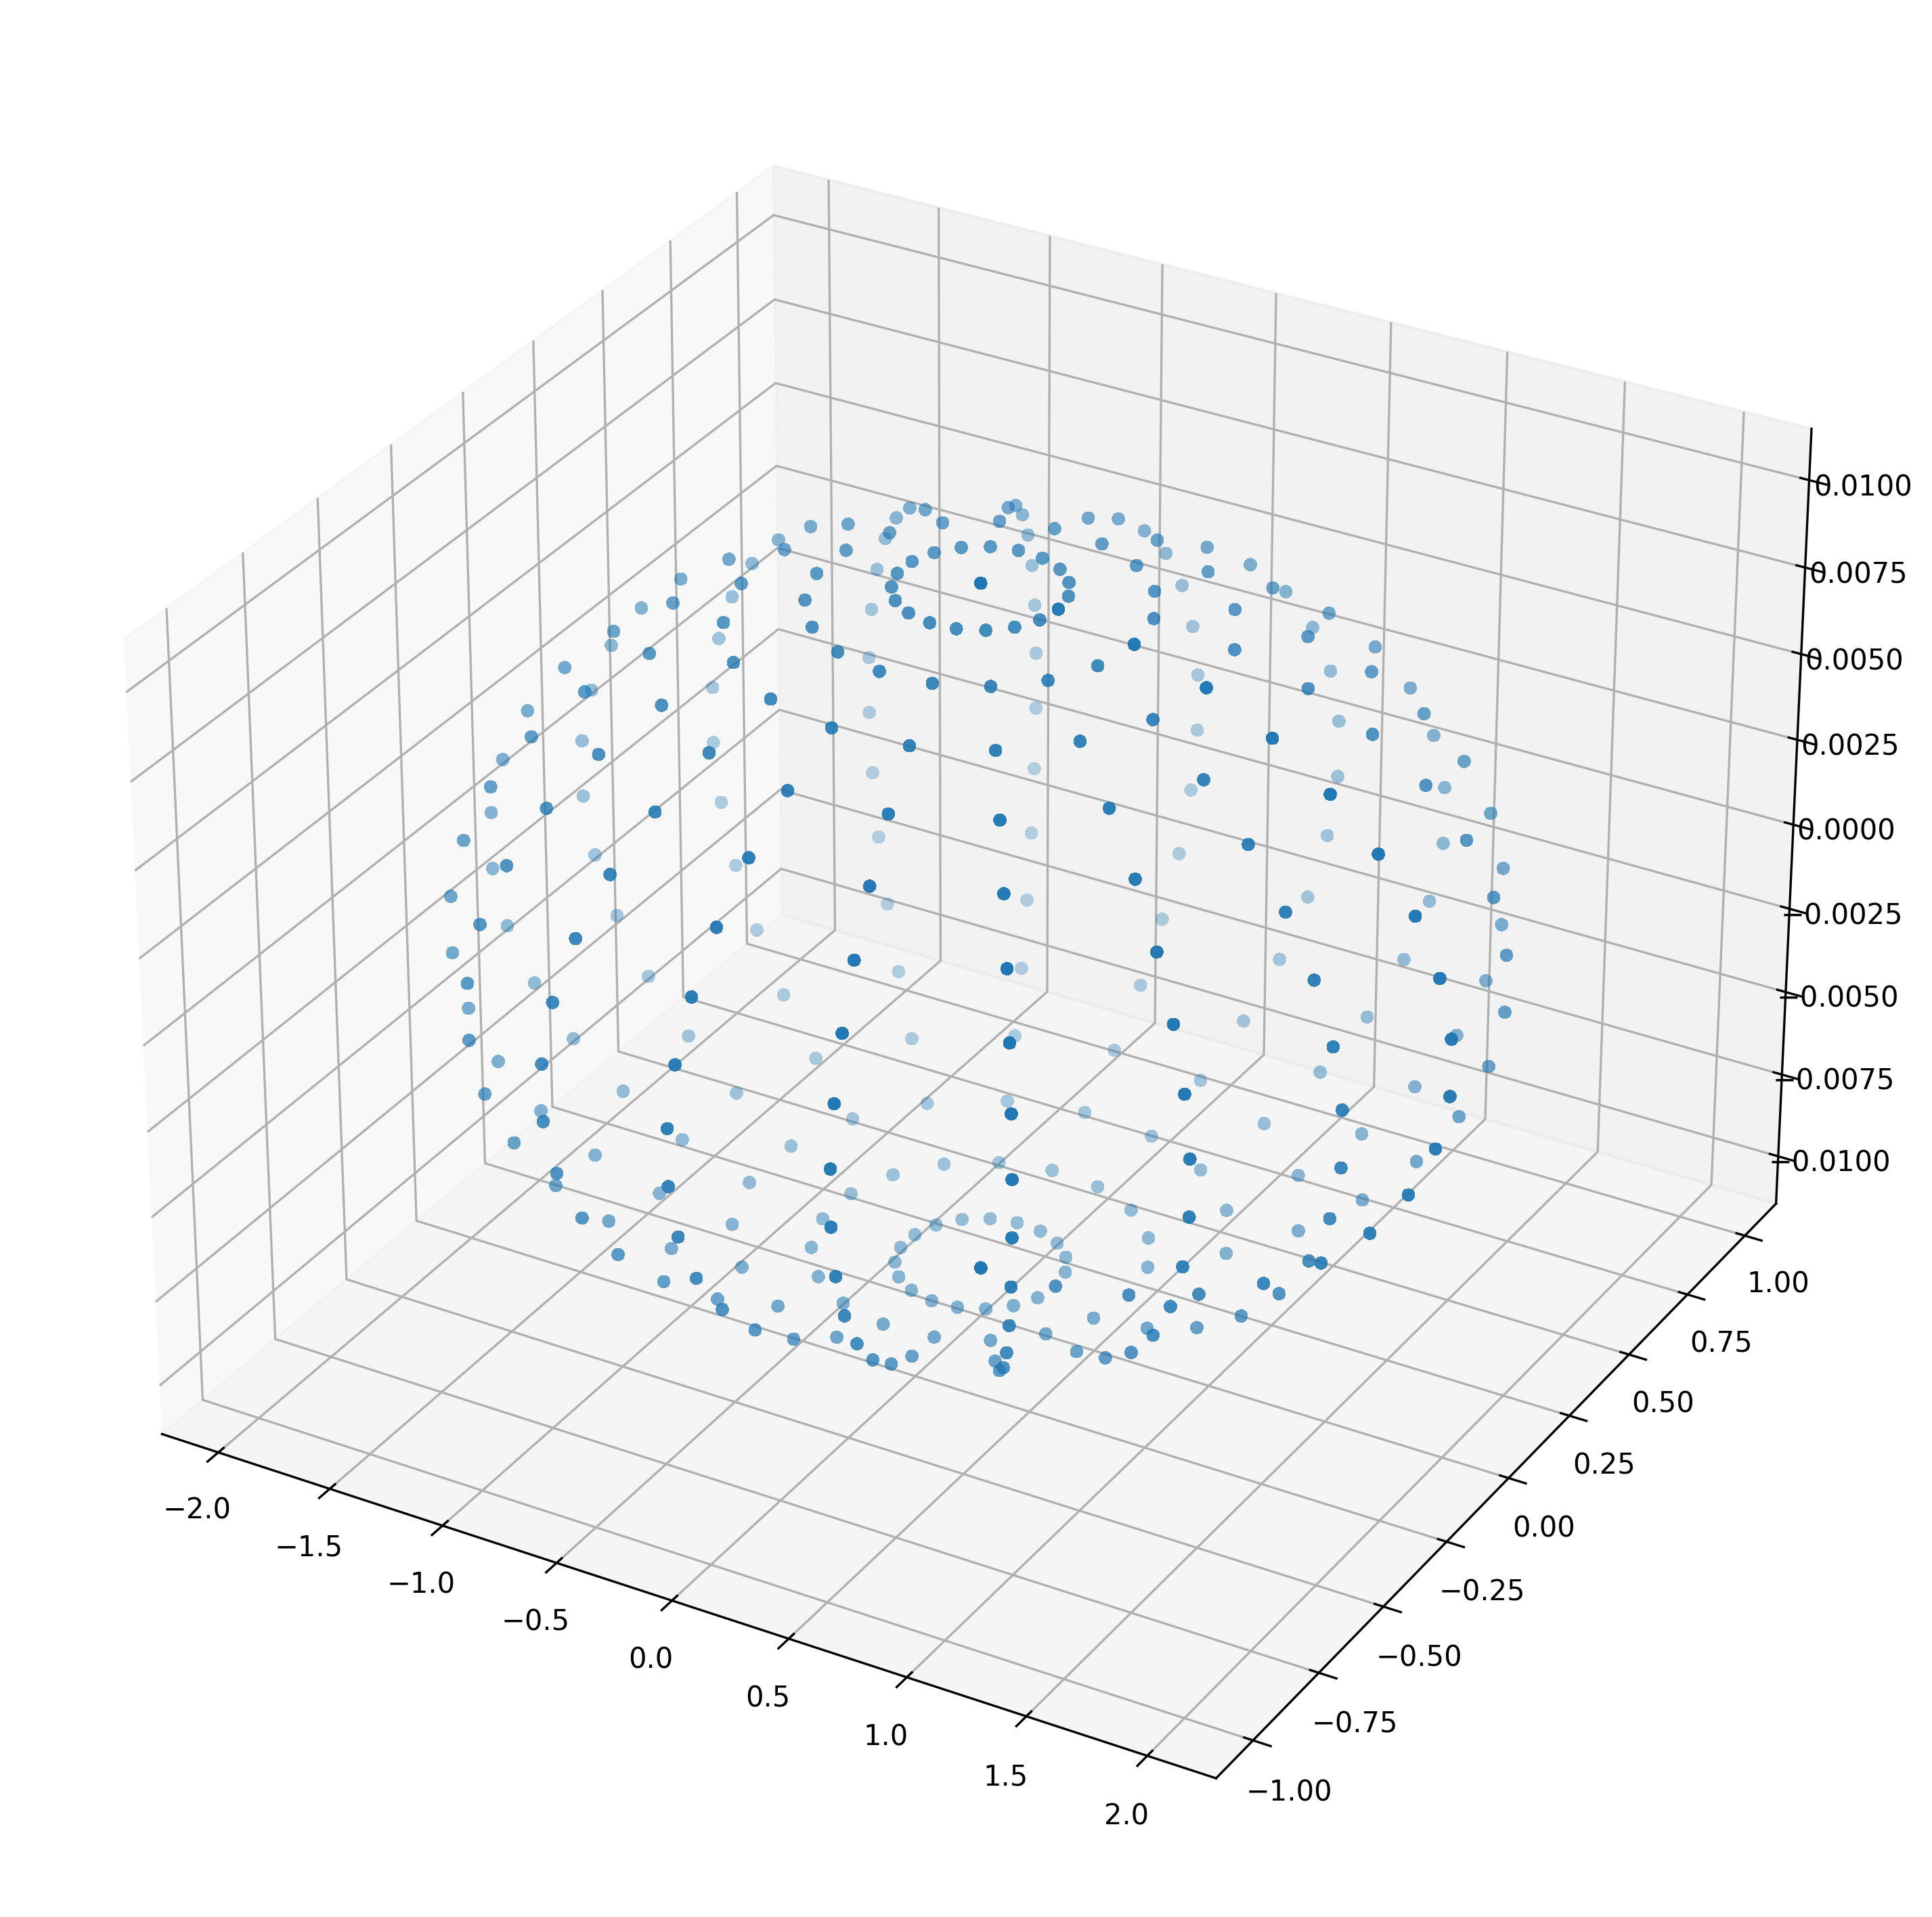

In [121]:
# Wygeneruj taką macierz Ai, aby stosunek jej największej i najmniejszej wartości osobliwej był większy od 100. Narysuj odpowiadającą jej elipsoidę.

A4 = [[2,0,0],[0,1,0],[0,0,0.01]]

sA4 = A4 @ np.array([X,Y,Z])
draw(*sA4)

# Low rank - image compression

In [93]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

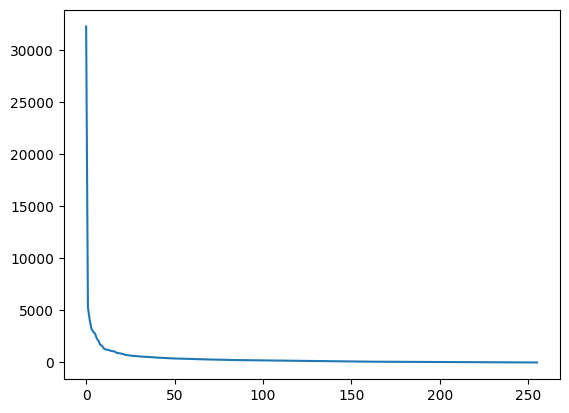

8:



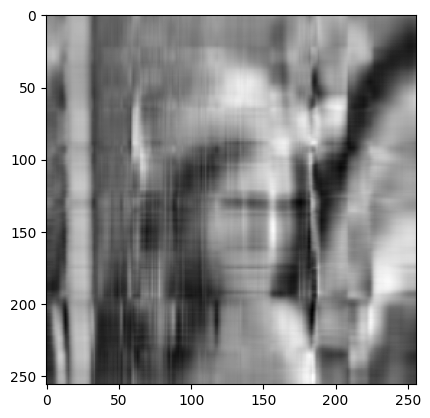

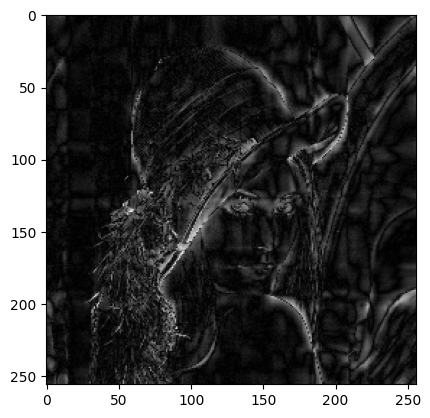

32:



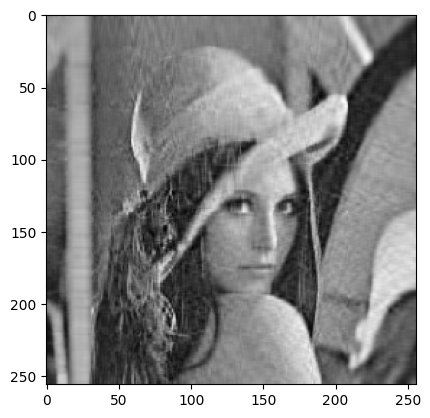

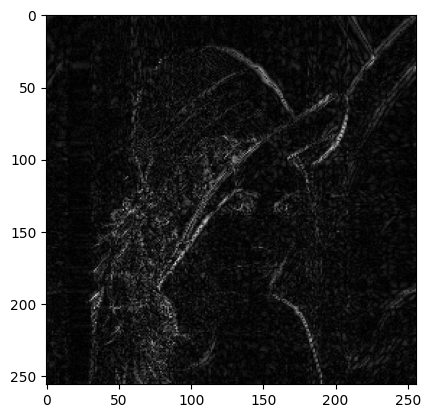

64:



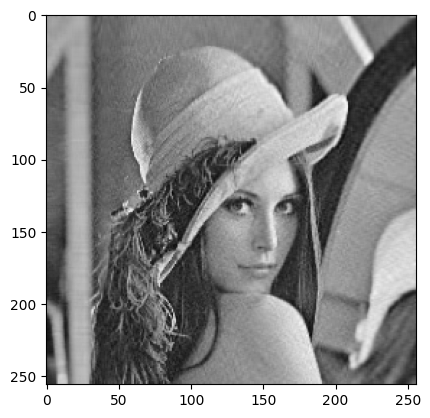

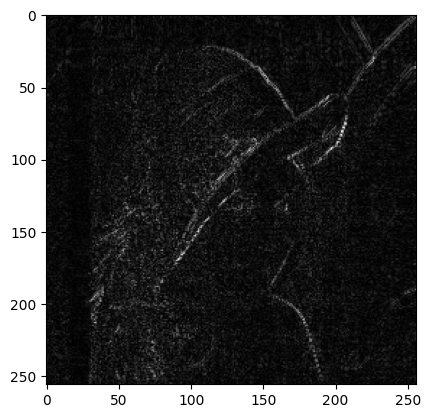

128:



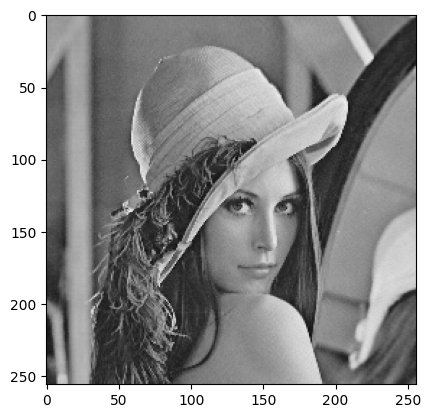

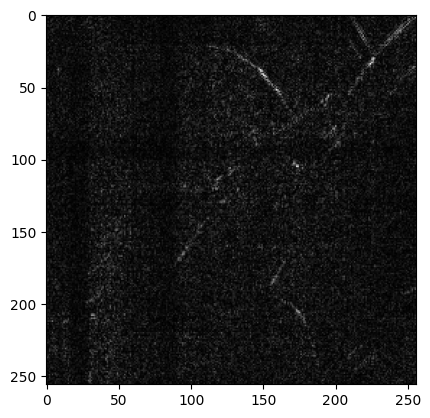

256:



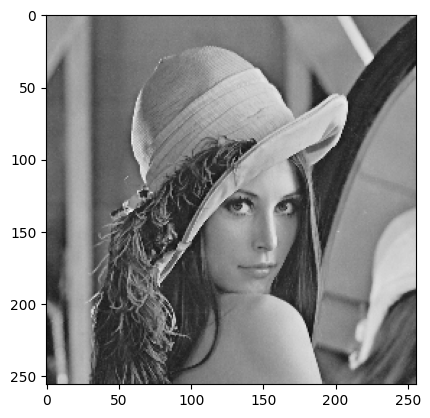

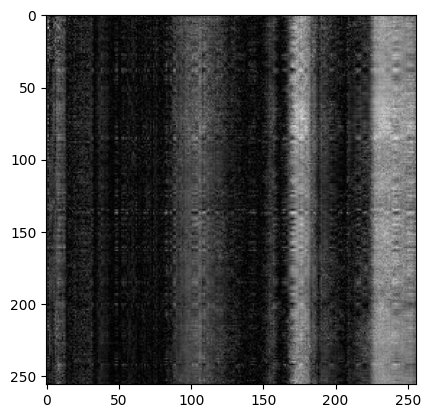

512:



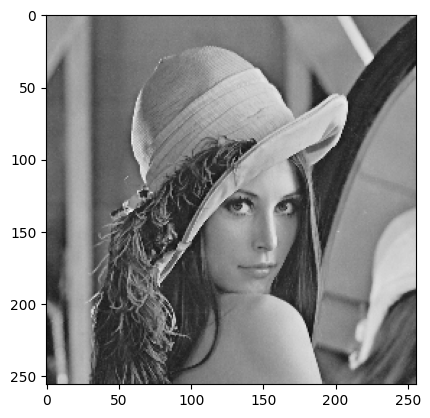

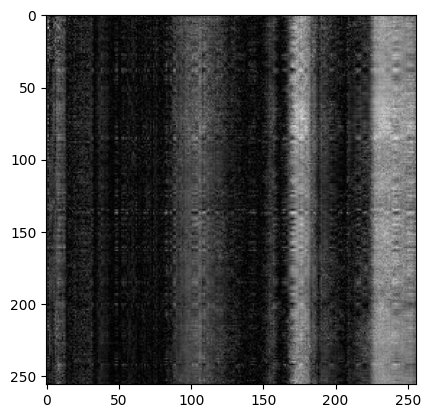

In [94]:
def compress(image, k):
    #                                                    U                                                          Σ                                                     V
    return np.linalg.svd(image, full_matrices=False)[0][:,:k] @ np.diag(np.linalg.svd(image, full_matrices=False)[1][:k]) @ np.linalg.svd(image, full_matrices=False)[2][:k,:]


def processImage(image, ranks = [8, 32, 64, 128, 256, 512]):
    compressed = {k: compress(image, k) for k in ranks}
    diff = {k: np.abs(image - compressed[k]) for k in ranks}
    return compressed, diff

def plot(img):
    plt.imshow(img, cmap='gray')
    plt.show()

img = Image.open('lenna.png').convert('L')
compressed, diff = processImage(np.array(img))

plt.plot(np.linalg.svd(np.array(img), full_matrices=False)[1])
plt.show()

for x in compressed:
    print(str(x) + ":\n")
    plot(compressed[x])
    plot(diff[x])